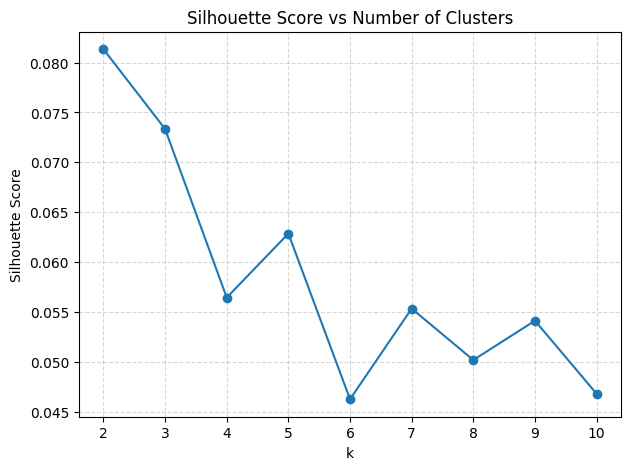

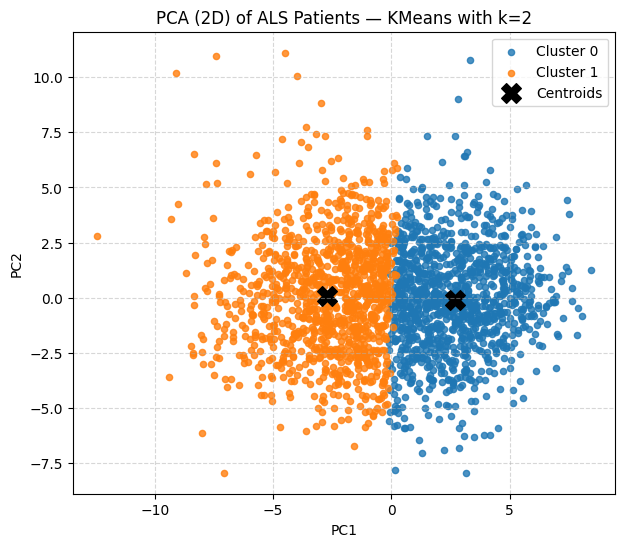

 ALS Clustering Results
Total Patients (rows): 2223
Original Features: 95
Optimal Number of Clusters (k): 2
Best Silhouette Score: 0.081
Cluster Sizes: [1118 1105]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# 1. Load Data
file_path = r"C:\Users\pheno\OneDrive\Desktop\DSC630\als_data.csv"
df = pd.read_csv(file_path)

# 2. Keep only numeric, patient-condition-related columns
drop_cols = [c for c in df.columns if "id" in c.lower() or "name" in c.lower() or "date" in c.lower()]
df = df.drop(columns=drop_cols, errors="ignore")
X = df.select_dtypes(include=[np.number])

# 3. Handle missing values + scale
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 4. Silhouette scores for range of K
sil_scores = []
k_range = range(2, 11)  # 2–10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot silhouette vs K
plt.figure(figsize=(7,5))
plt.plot(k_range, sil_scores, marker='o')
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 5. Choose optimal k (highest silhouette)
best_k = k_range[int(np.argmax(sil_scores))]
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_scaled)
best_sil = max(sil_scores)

# 6. PCA transformation
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 7. Scatterplot with cluster coloring
plt.figure(figsize=(7,6))
for cluster in np.unique(labels):
    mask = labels == cluster
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], label=f"Cluster {cluster}", s=20, alpha=0.8)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:,0], 
            pca.transform(kmeans.cluster_centers_)[:,1],
            c="black", marker="X", s=200, label="Centroids")
plt.title(f"PCA (2D) of ALS Patients — KMeans with k={best_k}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# 8. Print 
print("="*60)
print(" ALS Clustering Results")
print("="*60)
print(f"Total Patients (rows): {X_scaled.shape[0]}")
print(f"Original Features: {df.shape[1]}")
print(f"Optimal Number of Clusters (k): {best_k}")
print(f"Best Silhouette Score: {best_sil:.3f}")
print("Cluster Sizes:", np.bincount(labels))
print("="*60)


The clustering analysis of the ALS patient dataset provided an opportunity to examine hidden patterns within the anonymized clinical features while maintaining a rigorous data preprocessing pipeline. The dataset initially contained 95 features across 2,223 patients. To focus on ALS-related information, administrative identifiers such as patient IDs, names, and date fields were removed, as they did not directly contribute to the medical aspects of the condition. The remaining numeric features were preprocessed by applying median imputation to handle missing values and standardized using a StandardScaler. This ensured that all variables were normalized to the same scale, preventing features with larger ranges from dominating the clustering process. After cleaning, the dataset was ready for exploratory clustering analysis using the K-Means algorithm.

To identify the most suitable number of clusters, silhouette analysis was conducted for values of k between two and ten. The silhouette score measures the degree of cohesion within clusters and the separation between different clusters, with values closer to one indicating stronger clustering quality. The results indicated that the optimal configuration occurred at k = 2, with a best silhouette score of 0.081. Although the score is relatively low, which suggests that the clusters overlap substantially, the analysis still supports the presence of two broad patient subgroups. Choosing a higher k would have resulted in lower silhouette scores and greater fragmentation of the data, reducing interpretability and offering little practical benefit. Thus, the decision to adopt two clusters represents a balance between model fit and interpretability.

When K-Means was fitted with two clusters, the patient population was split nearly evenly: 1,118 individuals in the first cluster and 1,105 in the second. This balanced distribution indicates that no cluster is disproportionately dominant, and both groups represent meaningful partitions of the dataset. A Principal Component Analysis (PCA) was then applied to reduce the high-dimensional standardized features into two principal components for visualization. The PCA scatterplot revealed two overlapping but distinguishable clouds of patients, each colored according to its cluster assignment. The cluster centroids, represented by black “X” markers, highlighted the average profiles for each subgroup, further reinforcing the partitioning produced by the model.

Conclusion: The analysis demonstrates that the ALS patient dataset can be separated into two broad subpopulations, though with modest distinctiveness given the silhouette score of 0.081. This outcome suggests that while clustering can reveal general groupings, the patient data does not exhibit highly discrete subtypes when considered through K-Means alone. Nevertheless, the findings are useful in showing that ALS patients may fall into two general categories that warrant further investigation. Future analyses could incorporate alternative clustering methods, additional domain-specific feature engineering, or supervised learning approaches to refine subgroup identification. Overall, this exercise illustrates the strengths and limitations of applying unsupervised learning techniques to complex clinical datasets.